<a href="https://colab.research.google.com/github/haley3y/ITP_ML/blob/main/Final_Yue_Hailin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Machine Learning Final Project DUE: Friday May 7th 11:59pm**

**Note: Please read all the instructions carefully before starting the project.**

For your final project you will build an ML model to analyze a dataset of your choice. You are welcome to keep working on the data in your EDA project if your data is large enough (at least 1000 rows for simple models and at least 10,000 for more complex models) or you can choose from the datasets/project suggestions below.

In this project make sure that you:
- Have a large enough dataset
- Split your data in training and testing
- Explore your data to inform which type of model to choose (no need if you are using your EDA dataset)
- Try different models on your training dataset - then select the most promising model
- Use cross validation to fine tune the model’s parameters such as alpha in lasso
- Simplify your model using regularization, prunnning, drop-out, etc. to avoid overfitting
- Communicate your model’s performance and make sure you compare it to a benchmark when appropriate
- Plot interesting graphs and results
- Write and publish your article to medium
- Commit your code to your GitHub

Please ensure you handle all the preprocessing before the modeling.

Suggestions for project:
You can take a look at the resources given below for choosing a dataset for your project. 

- Traffic sign detection - https://benchmark.ini.rub.de/gtsdb_dataset.html
- Cat and dog classifier - https://www.kaggle.com/c/dogs-vs-cats/data
- Other datasets from Kaggle - https://www.kaggle.com/data/41592

## **Grading Criteria**

- Show clear exploration of the data to justify model choice
- Train mutliple models and clearly articulate why you chose your final model
- Show your performance on test dataset
- Clear and concise write-up with clear well-documented figures
- Commit your code to GitHub

## **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Friday (05/07/2021)
- To submit your assignment, download your notebook and the dataset, zip the dataset and notebook, and submit the zipped file on blackboard.
- Make sure the notebook is named in the format - Final_LastName_FirstName. If you are submitting a zipped file, please name the file as well in the same format.
- Please include the link to access your blog and your github repo in your notebook.
- Also include the link to your notebook, github repo and the blog in the submission on blackboard. Please ensure the TAs have the required access to your notebooks and the github repo.

**Note - If the dataset is too large to be zipped and submitted on blackboard, only submit your notebook, add your dataset to your google drive and share a link to the file in your notebook.**

Medium post: https://hailinyu.medium.com/predict-future-credit-card-default-fe2aa1a9734a

**Context**

Credit card default can induce losses to the bank, therefore upon lending, bank often face a binary decision on whether or not to approve a transaction. To effectively come to this conclusion, an internal credit score is usually generated by bank to facilitate this decision.

This project seeks build a machine learning model to predict if an applicant is a "good" or "bad" client based on personal information and past records.

In [36]:
# Load library
import pandas as pd
import numpy as np
import seaborn as sb
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
# Load data
pd.set_option('display.max_columns', None)

cred_record = pd.read_csv('credit_record.csv')
app_record = pd.read_csv('application_record.csv')

* ID: Unique Id of the row
* CODE_GENDER: Gender of the applicant. M is male and F is female.
* FLAG_OWN_CAR: Is an applicant with a car. Y is Yes and N is NO.
* FLAG_OWN_REALTY: Is an applicant with realty. Y is Yes and N is No.
* CNT_CHILDREN: Count of children.
* AMT_INCOME_TOTAL: the amount of the income.
* NAME_INCOME_TYPE: The type of income (5 types in total).
* NAME_EDUCATION_TYPE: The type of education (5 types in total).
* NAME_FAMILY_STATUS: The type of family status (6 types in total).
* DAYS_BIRTH: The number of the days from birth (Negative values).
* DAYS_EMPLOYED: The number of the days from employed (Negative values). This column has error values.
* FLAG_MOBIL: Is an applicant with a mobile. 1 is True and 0 is False.
* FLAG_WORK_PHONE: Is an applicant with a work phone. 1 is True and 0 is False.
* FLAG_PHONE: Is an applicant with a phone. 1 is True and 0 is False.
* FLAG_EMAIL: Is an applicant with a email. 1 is True and 0 is False.
* OCCUPATION_TYPE: The type of occupation (19 types in total). This column has missing values.
CNT_FAM_MEMBERS: The count of family members.


* STATUS	Status	
0: 1-29 days past due 
1: 30-59 days past due 
2: 60-89 days overdue 
3: 90-119 days overdue 
4: 120-149 days overdue 
5: Overdue or bad debts, write-offs for more than 150 days 
C: paid off that month X: No loan for the month

**Exploratory Analysis**

In [3]:
print(cred_record.shape)
# credit record has 1048575 rows and three features

print(app_record.shape)      
# application record has 16900 rows and 18 features                             

(1048575, 3)
(16900, 18)


* application_record.csv contains appliers personal information, which you could use as features for predicting.

* credit_record.csv records users' behaviors of credit card.

In [4]:
print(cred_record.info())
print(app_record.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16900 entries, 0 to 16899
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   16900 non-null  int64  
 1   CODE_GENDER          16900 non-null  object 
 2   FLAG_OWN_CAR         16900 non-null  object 
 3   FLAG_OWN_REALTY      16900 non-null  object 
 4   CNT_CHILDREN         16900 non-null  int64  
 5   AMT_INCOME_TOTAL     16900 non-null  float64
 6   NAME_INCOME_TYPE     16900 non-null  object 
 7   NAME_EDUCATION_TYPE  16900 non-null  o

In [5]:
print(cred_record['ID'].nunique())
# There are 45985 unique rows by ID, this means that each id has duplicated transaction records

print(app_record['ID'].nunique())
# There are 16900, meaning that there are duplicated personal information 

# Because there are duplicated personal information in the dataset
# We will delete the duplicate data, and keeping only the last updated entry if id is duplicated
app_record = app_record.drop_duplicates('ID', keep='last') 

45985
16900


In [6]:
# check how many records are matched between the two dataset
len(set(cred_record['ID']).intersection(set(app_record['ID'])))
# 11640 id/records are matched

11640

In [7]:
# Checking for null value
print(cred_record.isnull().sum(axis = 0))
print(app_record.isnull().sum(axis = 0))


ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64
ID                        0
CODE_GENDER               0
FLAG_OWN_CAR              0
FLAG_OWN_REALTY           0
CNT_CHILDREN              0
AMT_INCOME_TOTAL          0
NAME_INCOME_TYPE          0
NAME_EDUCATION_TYPE       0
NAME_FAMILY_STATUS        1
NAME_HOUSING_TYPE         1
DAYS_BIRTH                1
DAYS_EMPLOYED             1
FLAG_MOBIL                1
FLAG_WORK_PHONE           1
FLAG_PHONE                1
FLAG_EMAIL                1
OCCUPATION_TYPE        5263
CNT_FAM_MEMBERS           1
dtype: int64


In [8]:
# There are lots of missing value in column occupation_type, so I decided to drop this column
app_record.drop('OCCUPATION_TYPE', axis=1, inplace=True) 
print(app_record.isnull().sum(axis = 0))


ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     1
NAME_HOUSING_TYPE      1
DAYS_BIRTH             1
DAYS_EMPLOYED          1
FLAG_MOBIL             1
FLAG_WORK_PHONE        1
FLAG_PHONE             1
FLAG_EMAIL             1
CNT_FAM_MEMBERS        1
dtype: int64


In [9]:
# Gender proportion in applicants
label_gen = ["M","F"]

fig = px.pie(app_record, names='CODE_GENDER',hover_data=['CODE_GENDER'])
fig.show()

In [10]:
# Family status in applicants
fig = px.pie(app_record, names='NAME_FAMILY_STATUS',hover_data=['NAME_FAMILY_STATUS'])
fig.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Mean Income: 187801.69


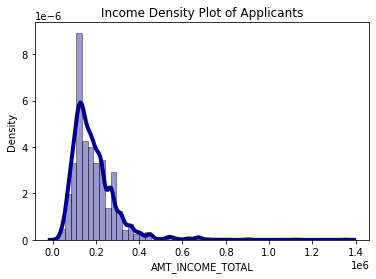

In [11]:
# Density Plot of Income (x)
ax1 = sb.distplot(app_record["AMT_INCOME_TOTAL"], hist = True, kde=True,
            color = "darkblue", hist_kws={'edgecolor':'black'}, 
            kde_kws={'linewidth': 4})

ax1.set_title("Income Density Plot of Applicants")

print("Mean Income:",round(np.mean(app_record["AMT_INCOME_TOTAL"]),2))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Mean age: 43.8


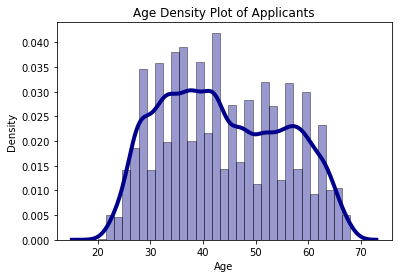

In [27]:
# Density Plot of Age (x)
app_copy = app_record
app_copy['Age']=-(app_copy['DAYS_BIRTH'])//365	

ax2 = sb.distplot(app_copy["Age"], hist = True, kde=True,
            color = "darkblue", hist_kws={'edgecolor':'black'}, 
            kde_kws={'linewidth': 4})

ax2.set_title("Age Density Plot of Applicants")

print("Mean age:",round(np.mean(app_copy["Age"]),2))

In [13]:
cred_record['STATUS'].value_counts() 

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

**Dependent variable: **

STATUS Status
0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month

In [14]:
# Convert C & X into numerical value
cred_record['STATUS'] = cred_record['STATUS'].replace(['X'],0)
cred_record['STATUS'] = cred_record['STATUS'].replace(['C'],0)
# Convert data type to numerical value
cred_record['STATUS'] = cred_record['STATUS'].astype('int')
# perform value count on status 
# cred_record['STATUS'].value_counts() 
# (0) Classified 0 1 as "good" applicants  
# (1) Classfied 2,3,4,5 as "bad" applicants; Users who overdue for more than 60 days as target risk users 
cred_record['STATUS'] = cred_record['STATUS'].apply(lambda x:1 if x >= 2 else 0)
cred_record['STATUS'] = cred_record['STATUS'].astype('int')
# perform value count on status 
cred_record['STATUS'].value_counts()

# Select the highest status. Setting the highest level of delingquency for each id
cred_record = cred_record.groupby('ID')['STATUS'].max().reset_index()
# perform value count on status 
cred_record['STATUS'].value_counts()


0    45318
1      667
Name: STATUS, dtype: int64

In [15]:
# Join the two tables
#df=pd.merge(cred_record, app_record,how='inner',on='ID')
df=pd.merge(cred_record, app_record, left_on='ID', right_on='ID')
# print(df.info())
print(df.shape)

# drop missing data
df.dropna()
df = df.mask(df == 'NULL').dropna()

print(df.isnull().sum(axis = 0))


(11640, 19)
ID                     0
STATUS                 0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
CNT_FAM_MEMBERS        0
Age                    0
dtype: int64


**Pre-processing**

In [ ]:
# Drop the column that are not needed
y = df['STATUS']


X = df.drop(['STATUS','ID'], axis=1)
X = pd.get_dummies(X)

# Take a look at the dataset
# print(y.head())
# print(X.head())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    stratify=y, test_size=0.3,
                                                    random_state = 2020)
# Normalizing the data
mms = MinMaxScaler()
X_scaled = pd.DataFrame(mms.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(mms.transform(X_test), columns=X_test.columns)


# # Using Synthetic Minority Over-Sampling Technique(SMOTE) to overcome sample imbalance problem.
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train_bal, y_train_bal = oversample.fit_resample(X_scaled, y_train)
X_test_bal, y_test_bal = oversample.fit_resample(X_test_scaled, y_test)



**Decision tree**

Accuracy on Training partition: 0.9579323957562299
Accuracy on Testing partition: 0.8070503597122303
[[3220  255]
 [1086 2389]]


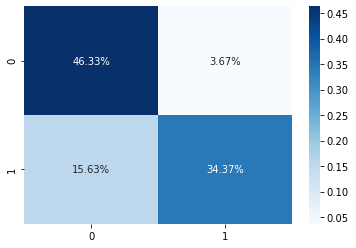

In [41]:

# # Using Synthetic Minority Over-Sampling Technique(SMOTE) to overcome sample imbalance problem.
# Y = y.astype('int')
# X_balance,Y_balance = SMOTE().fit_sample(X,Y)
# X_balance = pd.DataFrame(X_balance, columns = X.columns)


# Build a Decision Tree model 
dt = DecisionTreeClassifier(criterion='entropy', max_depth =8, random_state=2020)
dt.fit(X_train_bal, y_train_bal)
y_pred_bal = dt.predict(X_test_bal)

# Print the accuracy on the test partition
training_pred = dt.predict(X_train_bal)
acc_training = accuracy_score(training_pred, y_train_bal)
print("Accuracy on Training partition:",acc_training)

# Print the accuracy on the test partition
acc_testing = accuracy_score(y_pred_bal,y_test_bal)
print("Accuracy on Testing partition:",acc_testing)

cf_matrix = confusion_matrix(y_test_bal,y_pred_bal)
print(cf_matrix)
sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')


In [17]:
# Calculate the top 3 important features for the above Decison Tree
feature_importances = dt.feature_importances_
features = X_train.columns
df = pd.DataFrame({'features': features, 'importance': feature_importances}).nlargest(3,'importance')
print(df)

          features  importance
8  CNT_FAM_MEMBERS    0.231332
0     CNT_CHILDREN    0.135961
3    DAYS_EMPLOYED    0.101426


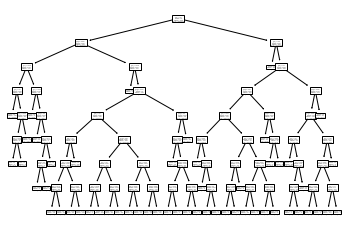

In [18]:
# Plot the Decision Tree Result
plt.figure(2)
dfTree = tree.plot_tree(dt)
plt.show()


**Logistic Regression**

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.5989928057553957
[[2320 1155]
 [1632 1843]]


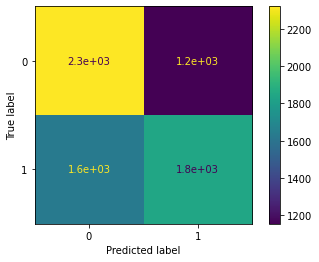

In [20]:
model2 = LogisticRegression()

model2.fit(X_train_bal, y_train_bal)
y_pred2 = model2.predict(X_test_bal)

# Display the accuracy of the predictions
print(metrics.accuracy_score(y_test_bal, y_pred2))

# Display the confusion matrix along with the labels (Yes, No)
cnf_matrix = metrics.confusion_matrix(y_test_bal, y_pred2)
print(cnf_matrix)
metrics.plot_confusion_matrix(model2, X_test_bal, y_test_bal)
plt.show()

**Bagging ensemble**

In [21]:
model_bagging = BaggingClassifier(n_estimators = 7,random_state = 42)
model_bagging.fit(X_train_bal, y_train_bal)

# Display the accuracy of the predictions
acc_bagging = accuracy_score(y_test_bal, model_bagging.predict(X_test_bal))
print(' Accuracy = ', acc_bagging)

 Accuracy =  0.815251798561151


**RandomForest**

In [22]:
model_rf = RandomForestClassifier(n_estimators=100, max_features=7, random_state = 42)
model_rf.fit(X_train_bal, y_train_bal)

# Display the accuracy of the predictions
acc_rf = model_rf.score(X_test_bal,y_test_bal)
print(' Accuracy = ', acc_rf)

 Accuracy =  0.8141007194244604


In [23]:
# Calculate the top 3 important features for the above RandomForest
feature_importances = model_rf.feature_importances_
features = X_train.columns
df = pd.DataFrame({'features': features, 'importance': feature_importances}).nlargest(3,'importance')
print(df)

          features  importance
8  CNT_FAM_MEMBERS    0.115934
0     CNT_CHILDREN    0.089969
6       FLAG_PHONE    0.068188


**Boosting**

In [47]:
# AdaBoost Classification
base_est = DecisionTreeClassifier (max_depth =4)
ada_boost = AdaBoostClassifier(base_est, n_estimators=75, random_state=42, learning_rate=.02)
ada_boost.fit(X_train_bal, y_train_bal)

acc_ad = ada_boost.score(X_test_bal,y_test_bal)
print(' Accuracy = ', acc_ad)


 Accuracy =  0.9522302158273381


In [25]:
# Top 3 features for AdaBoost
feature_importances2 = ada_boost.feature_importances_
features = X_train.columns
df2 = pd.DataFrame({'features': features, 'importance': feature_importances2}).nlargest(3,'importance')
print(df2)

          features  importance
9              Age    0.143219
8  CNT_FAM_MEMBERS    0.141241
6       FLAG_PHONE    0.070857


**Voting Ensemble**

In [48]:
# Voting Ensemble for Classification

rfClf = RandomForestClassifier(max_depth = 8,n_estimators=100, random_state=0) 
svmClf = SVC(probability=True, random_state=0) 

clf = VotingClassifier(estimators = [('rf',rfClf), ('svm',svmClf)], voting='soft') 
clf.fit(X_train_bal, y_train_bal)
clf_pred = clf.predict(X_test_bal)
acc_clf = accuracy_score(y_test_bal, clf_pred)
print(' Accuracy = ', acc_clf)



 Accuracy =  0.7892086330935252
